In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import *

import pandas as pd
import numpy as np
import matplotlib.dates as mdates



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [13]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [14]:
df=pd.read_csv("./CSV/금리,환율_전처리.csv",index_col='일자',encoding='euc-kr')

In [15]:
df1=pd.read_csv("../삼성바이오로직스 공매도.csv")

In [17]:
df2=df1.drop(labels=range(0,258),axis=0)

In [18]:
df2.set_index('일자', inplace=True)
print(df2)

            공매도 수량(전체)  공매도 수량(잔고수량)   공매도 금액(전체)  공매도 금액(잔고금액)
일자                                                             
2020-03-13       58635       1236671  26247612000  5.645400e+11
2020-03-12       20887       1211919   9980150500  5.853570e+11
2020-03-11       18638       1230236   9188257500  5.954340e+11
2020-03-10       13104       1217812   6478171000  6.040350e+11
2020-03-09       25212       1207504  12408429500  5.965070e+11
...                ...           ...          ...           ...
2016-11-16       85038         70361  14336179500  1.196137e+10
2016-11-15       51027         26731   8677236500  4.437346e+09
2016-11-14       42439         16794   7343304000  2.947347e+09
2016-11-11       33990             0   5706007000  0.000000e+00
2016-11-10        9161             0   1320042500  0.000000e+00

[819 rows x 4 columns]


In [19]:
df3=pd.merge(df,df2,left_on=['일자'],right_index=True)
df3

,금리,달러환율,공매도 수량(전체),공매도 수량(잔고수량),공매도 금액(전체),공매도 금액(잔고금액)
일자,,,,,,
2016-11-10,1.465,1145.8,9161,0,1320042500,0.000000e+00
2016-11-11,1.508,1151.0,33990,0,5706007000,0.000000e+00
2016-11-14,1.610,1164.4,42439,16794,7343304000,2.947347e+09
2016-11-15,1.635,1169.8,51027,26731,8677236500,4.437346e+09
2016-11-16,1.689,1168.8,85038,70361,14336179500,1.196137e+10
...,...,...,...,...,...,...
2020-03-09,1.038,1191.4,25212,1207504,12408429500,5.965070e+11
2020-03-10,1.082,1201.4,13104,1217812,6478171000,6.040350e+11
2020-03-11,1.086,1196.7,18638,1230236,9188257500,5.954340e+11


In [6]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 6)

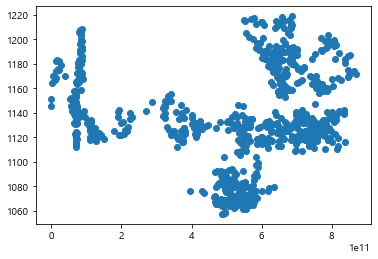

In [20]:
plt.scatter(df3['공매도 금액(잔고금액)'],df3['달러환율'])

In [21]:
pearsonr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

(0.02905961656288838, 0.4062344183993189)

In [22]:
spearmanr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

SpearmanrResult(correlation=0.16154881145769553, pvalue=3.3724478029466123e-06)

Text(0.5, 1.0, '삼성바이오로직스 공매도 금액과 환율')

Text(0, 0.5, '전체 거래대금(\\)')

Text(0.5, 0, 'Date')

Text(0, 0.5, '환율($->\\)')

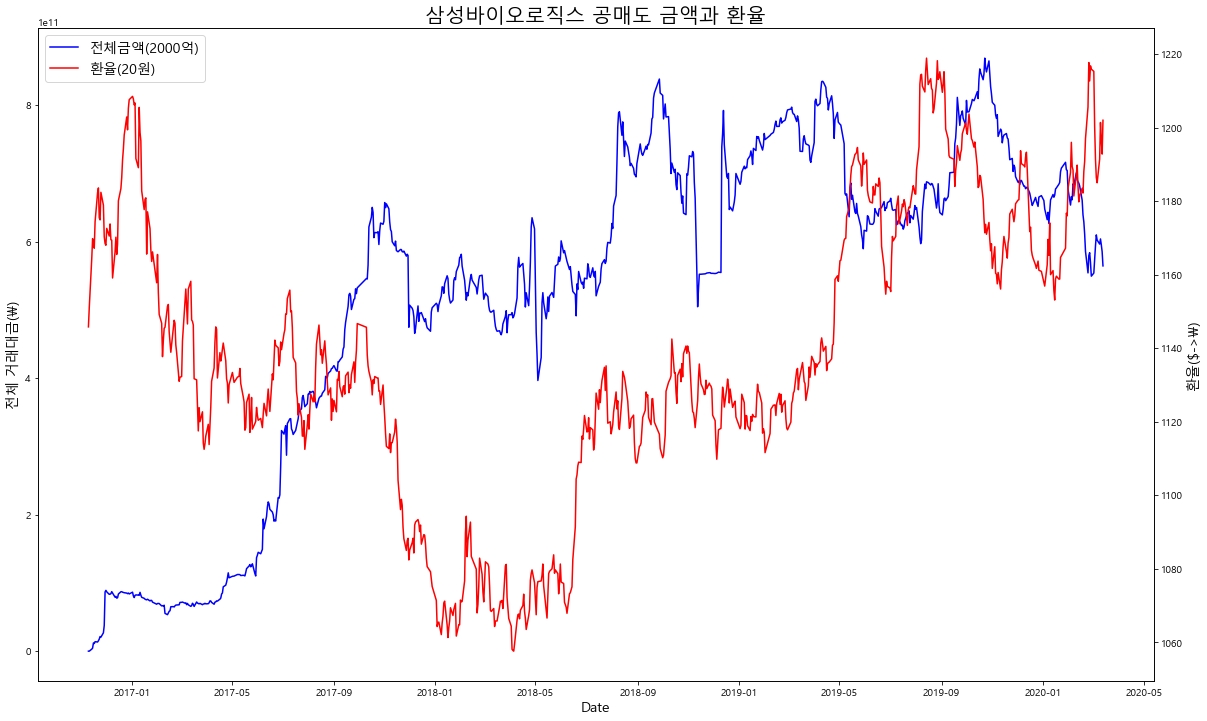

In [24]:
df3.index = pd.to_datetime(df3.index)

fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성
ax2 = ax.twinx()


line1=ax.plot(df3['공매도 금액(잔고금액)'], label='전체금액(2000억)', color='b')
line2=ax2.plot(df3['달러환율'],label='환율(20원)', color='r')


ax.set_title('삼성바이오로직스 공매도 금액과 환율', fontsize=20) # 타이틀 설정
ax.set_ylabel('전체 거래대금(\)', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y1축 설정
ax2.set_ylabel('환율($->\)', fontsize=14)   #y2축 설정



lines= line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='best',fontsize=14)

plt.show()